### 456_Assignment 5  
### Name: Justin Chong  
### Date: 11/15/2023

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [4]:
#read data
bean_df = pd.read_excel('Dry_Bean_Dataset.xlsx')
bean_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
#1. Exploratory Data Analysis
#a. Statistical Summary of Columns
bean_df.describe()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
'''^looking at the ranges of the values (which is important to determine whether to pre-process the data), 
a good amount of the data is actually already in a range between 0 and 1 (in which 0 and 1 range is a good 
indicator that some pre-process transformation is not needed). However, there are values that are also too large,
like Area and even values that seem way to small, like ShapeFactor1. This concludes that some form
of pre-process transformation may be needed and hence, a pipe may be consider for both the estimator and 
the preprocesser.'''
#print statement just so that the string comment above does not get printed (which will print in an unintended
#format)
print()

In [7]:
#b. dimension of dataset
#bean_df["Class"] returns a panda Series; convert to dataframe to make it consistent with the other data
#will use y_df.stack to return to original shape [row,]
y_df = pd.DataFrame(bean_df["Class"])
#x_df copies the entire bean_df but then drops the Class, which is the output/to be predicted.
x_df = bean_df.copy()
x_df.drop(columns='Class',inplace=True)

In [8]:
#ensures that bean_df is unaffected by x_df dropping 'Class'
bean_df["Class"]

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [9]:
#dimension for the whole dataset
print("Dimensions for the dataset:\n")
print(f"Dimension for the whole dataset is {bean_df.shape}")
#dimension for the x/input
print(f"Dimension for the inputs is {x_df.shape}")
#dimension for the y/output
print(f"Dimension for the y/output is {y_df.shape}")

Dimensions for the dataset:

Dimension for the whole dataset is (13611, 17)
Dimension for the inputs is (13611, 16)
Dimension for the y/output is (13611, 1)


In [10]:
#c. count of each class
print("Count of each class:\n")
print(y_df.value_counts())

Count of each class:

Class   
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


In [11]:
#^The classes are not proportion equally; ex: BOMBAY is heavily lower than DEMRASON

In [12]:
_,class_name = pd.factorize(y_df.stack())
palette = sns.color_palette("hls",len(y_df.value_counts())).as_hex()

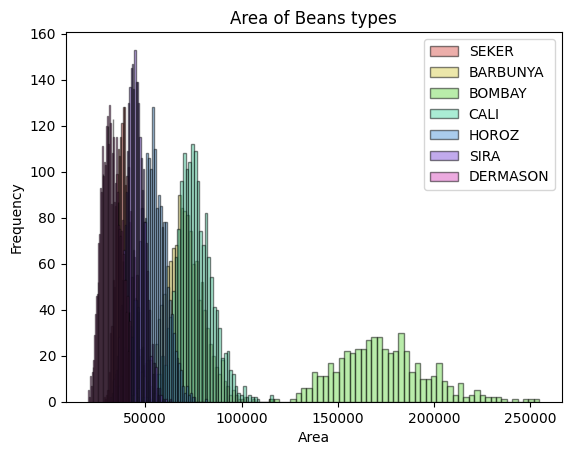

In [13]:
#plot area
plt.title("Area of Beans types")
plt.xlabel("Area")
plt.ylabel("Frequency")
for i in range(len(class_name)):
    temp = x_df.mask(y_df["Class"]!=class_name[i])
    plt.hist(temp["Area"],ec='black',bins=50,color=palette[i],alpha=.50,label=class_name[i])
    plt.legend()

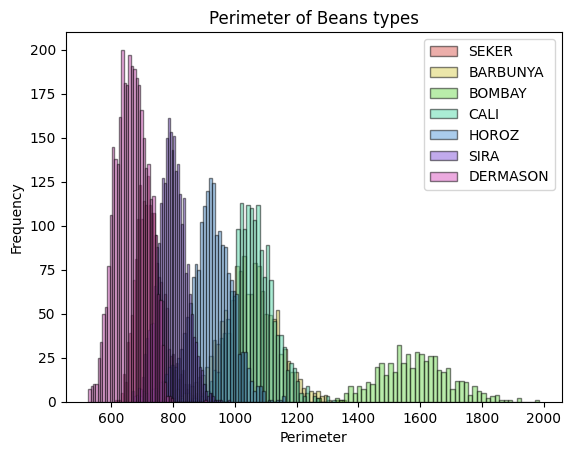

In [14]:
#plot perimeter
plt.title("Perimeter of Beans types")
plt.xlabel("Perimeter")
plt.ylabel("Frequency")
for i in range(len(class_name)):
    temp = x_df.mask(y_df["Class"]!=class_name[i])
    plt.hist(temp["Perimeter"],ec='black',bins=50,color=palette[i],alpha=.50,label=class_name[i])
    plt.legend()

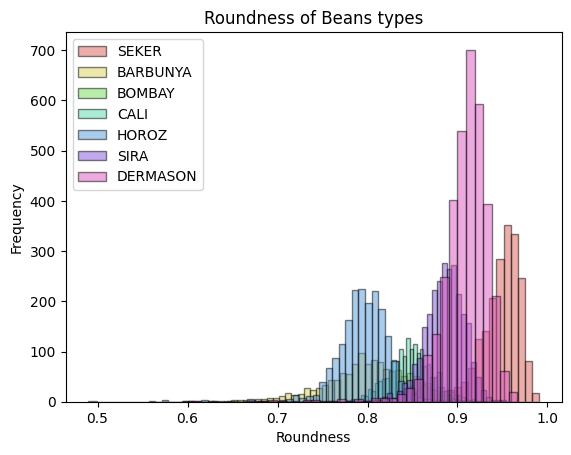

In [15]:
#plot roundness
plt.title("Roundness of Beans types")
plt.xlabel("Roundness")
plt.ylabel("Frequency")
for i in range(len(class_name)):
    temp = x_df.mask(y_df["Class"]!=class_name[i])
    plt.hist(temp["roundness"],ec='black',bins=50,color=palette[i],alpha=.50,label=class_name[i])
    plt.legend()

In [16]:
'''
Some observations of the plots
-Perimeter and Area are expected to correspond to one another
-Some individual classes have some notable spatial area of where they reside, ex: DERMASON in roundness tend
to reside around .86 and .95. BOMBAY beans also tend to have bigger area and perimeter.
-
'''

'\nSome observations of the plots\n-Perimeter and Area are expected to correspond to one another\n-Some individual classes have some notable spatial area of where they reside, ex: DERMASON in roundness tend\nto reside around .86 and .95. BOMBAY beans also tend to have bigger area and perimeter.\n-\n'

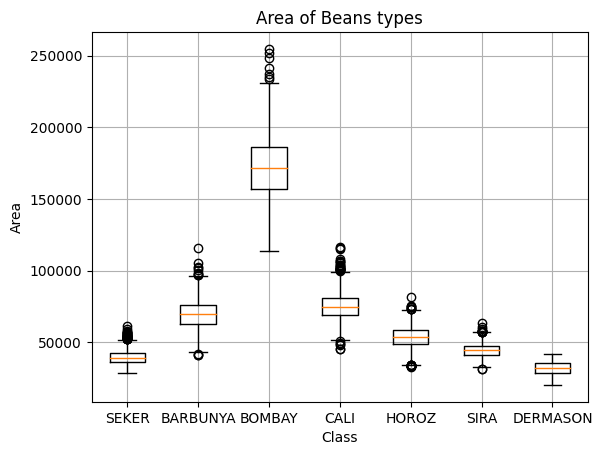

In [17]:
#boxplot for Area
plt.title("Area of Beans types")
plt.ylabel("Area")
plt.xlabel("Class")
plt.grid()
temp_array = []
for i in range(len(class_name)):
    temp = x_df.mask(y_df["Class"]!=class_name[i])
    temp = np.array(temp["Area"])
    temp = temp[temp>0]
    temp_array.append(temp)
plt.boxplot(temp_array,labels=class_name)
print()

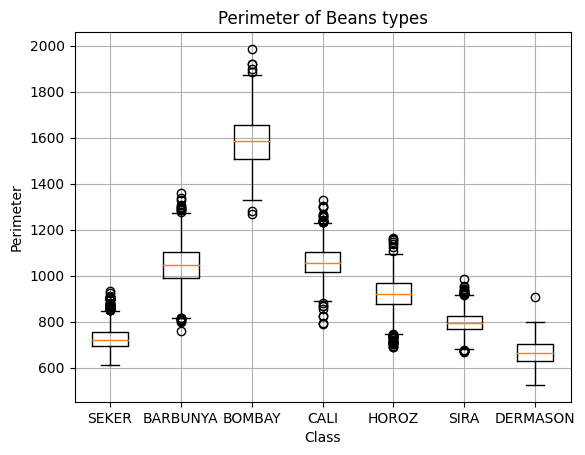

In [18]:
#boxplot for Perimeter
plt.title("Perimeter of Beans types")
plt.ylabel("Perimeter")
plt.xlabel("Class")
plt.grid()
temp_array = []
for i in range(len(class_name)):
    temp = x_df.mask(y_df["Class"]!=class_name[i])
    temp = np.array(temp["Perimeter"])
    temp = temp[temp>0]
    temp_array.append(temp)
plt.boxplot(temp_array,labels=class_name)
print()

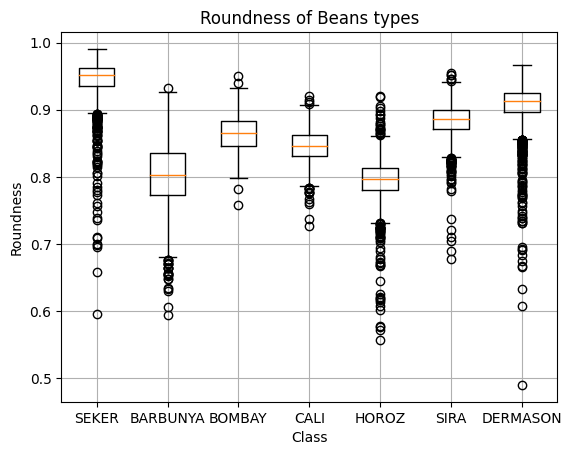

In [19]:
#boxplot for Roundness
plt.title("Roundness of Beans types")
plt.ylabel("Roundness")
plt.xlabel("Class")
plt.grid()
temp_array = []
for i in range(len(class_name)):
    temp = x_df.mask(y_df["Class"]!=class_name[i])
    temp = np.array(temp["roundness"])
    temp = temp[temp>0]
    temp_array.append(temp)
plt.boxplot(temp_array,labels=class_name)
print()

In [20]:
'''
Some observation of the boxplot
-Area and perimeter once again have similar correlation in the values like the histo plot
-Roundness is skewed towards the top and area and perimeter are skewed towards the bottom. This makes sense in
relation to the histo plot as in the histo, instead of the two sides being top and bottom, it was left and 
right, and those direction have similar correspondence pattern (area and perimeter are together while 
roundness is the opposite). 
-BOMBAY has a very clear outlier for its area and perimeter (being how large its normal values are)
    -other values of different class tend to have similar box placement but sometimes can be differentiate
    by other observations
-there are several outside values for a majority of the classes for all 3 categories. DERMASON is an exception
for perimeter and area. To note, DERMASON also have the most samples in the dataset. Currently I can only
think of possible outside influence related to the most samples that would explain why perimeter and area 
differ so much as I cannot currently see an intuitive inside relationship between not having outside values
for the size of the DERMASON beans and the amount of sample size. A possible outside influence I could assume
would be that DERMASON beans are already well known to farmers and how to grow them and standard method of
farming them is in place, being that it is the most common bean in this dataset. Having a standard method
could mean that they will grow out to be similar to one another. Other beans may have different method
of growing being that they are less known/grown. Note that this is an outside influence assumption and 
is a stretch from outside the statistics currently given.
'''
print()

In [21]:
#3. Predicting Bean Types
#a. 
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=.20, random_state=3)


In [22]:
#dimension of x_train and x_Test
print(f"Dimension x_train: {train_x.shape}")
print(f"Dimension x_test: {test_x.shape}")

Dimension x_train: (10888, 16)
Dimension x_test: (2723, 16)


In [23]:
#distribution of label in train and test datasets
print("\nOriginal y:\n")
print(y_df.value_counts())
print("\nTrain y:\n")
print(train_y.value_counts())
print("\nTest y:\n")
print(test_y.value_counts())


Original y:

Class   
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Train y:

Class   
DERMASON    2865
SIRA        2095
SEKER       1627
HOROZ       1523
CALI        1298
BARBUNYA    1064
BOMBAY       416
Name: count, dtype: int64

Test y:

Class   
DERMASON    681
SIRA        541
HOROZ       405
SEKER       400
CALI        332
BARBUNYA    258
BOMBAY      106
Name: count, dtype: int64


In [24]:
#^The proportion for the test and train are very similar to each other and the original dataset.
#BOMBAY is still the lowest sample and DERMASON is still the highest sample to start.

In [25]:
#b.
#1-Normalization makes it so that all values from different column serve the same or a similar amount of 
#impact on the model in deciding prediction to all the other columns. Column values can vary in ranges
#and generally, columns with higher values will have more impact on the model than other columns with lower
#range. Varying ranges should not be used in comparing columns; the values should only be compared with each
#other in the same column. Another reason for normalization is to compute faster. Normalizing the data 
#can also minimize the total digit used to represent a number's importance.
#2-As stated before when the data was being observed, the dataset should be normalized. I mention that the 
#ranges between the column differ, with some being too high and other being too low. They should be normalize
#so that the columns have equal impact.

#observe the normalization train:
print("Observe the normalization for train")
scaler_train = StandardScaler()
scaler_train.fit(train_x)
print(scaler_train.transform(train_x))
#observe the normalization test:
print("\nObserve the normalization for test:")
scaler_test = StandardScaler()
scaler_test.fit(test_x)
print(scaler_train.transform(test_x))
#will use a pipe model to normalize and use the estimator however

Observe the normalization for train
[[-0.46228872 -0.63806114 -0.75010618 ...  1.08288398  1.26502254
   0.68084908]
 [-0.37033238 -0.38805152 -0.38227954 ...  0.1052655   0.07151488
  -0.10582077]
 [ 0.58289019  0.90274475  0.50507074 ... -0.42873731  0.32856268
  -0.17489138]
 ...
 [-0.76187295 -0.9290896  -0.82615746 ...  0.44935275 -0.14362376
   0.40697117]
 [-0.29101962 -0.44180534 -0.58807417 ...  0.9309471   1.37354269
   0.92786375]
 [-0.13533286  0.11898152  0.50955717 ... -1.17189586 -1.73600457
   0.20957245]]

Observe the normalization for test:
[[ 3.90715781  3.37577503  3.13431078 ... -1.50616355 -0.28699705
  -2.59366327]
 [-0.12395365 -0.08182415 -0.1539195  ... -0.01144531  0.24587764
   0.1311737 ]
 [-0.30817386 -0.27661    -0.62045492 ...  1.00683099  1.44755669
   0.8069356 ]
 ...
 [ 0.58617068  0.76201606  0.57059459 ... -0.53606781  0.13084878
   0.51335825]
 [ 0.41995901  0.49588823  0.62082796 ... -0.77394804 -0.47213484
   0.14921075]
 [-0.67118098 -0.808651  

In [26]:
#c.
#set up the linear model
pipe_linear = make_pipeline(StandardScaler(),LinearRegression())
le = LabelEncoder()
#train_y and test_y classes are the same;should be no need to use the full dataset to get all the labels
le.fit(train_y.stack())
train_y_encode = le.transform(train_y.stack())
pipe_linear.fit(train_x,train_y_encode)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [27]:
#predict training with LinearRegression
print("Training prediction accuracy: ")
accuracy_score(pipe_linear.predict(train_x).round(),train_y_encode)

Training prediction accuracy: 


0.3488243938280676

In [28]:
#predict testing with LinearRegression
test_y_encode = le.transform(test_y.stack())
print("Testing prediction accuracy: ")
accuracy_score(pipe_linear.predict(test_x).round(),test_y_encode)

Testing prediction accuracy: 


0.34006610356224753

Attempt 1 Hyperparameters: Hidden Layer Size 4, Solver sgd, Learning_Rate_init 0.8, Max_iter 200


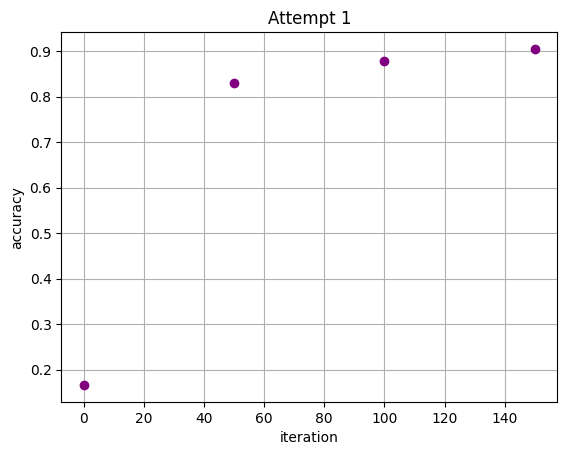

Final Accuracy: 0.9144930198383542
--------------------------------------
Attempt 2 Hyperparameters: Hidden Layer Size 8, Solver sgd, Learning_Rate_init 0.8, Max_iter 200


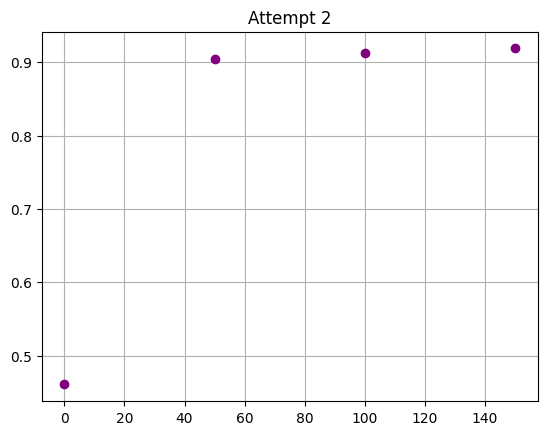

Final Accuracy: 0.9221160911094783
--------------------------------------
Attempt 3 Hyperparameters: Hidden Layer Size 8, Solver sgd, Learning_Rate_init 0.8, Max_iter 500


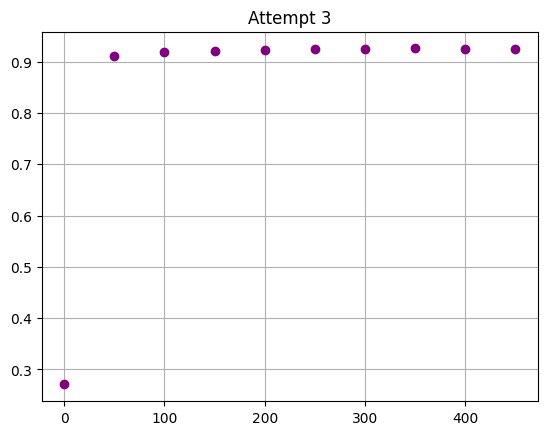

Final Accuracy: 0.9260653930933137
--------------------------------------


In [62]:
#c.
#hyper_param indexes: Hidden Layer Size, Solver, Learning_rate_init, Max_iter
hyper_param = [[4,'sgd',0.8,200],[8,'sgd',0.8,200],[8,'sgd',0.8,500]]
plt.title("hyperparameter iteraction to accuracy")
plt.xlabel("iteration")
plt.ylabel("accuracy")
for i in range(3):
    print(f"Attempt {i+1} Hyperparameters: Hidden Layer Size {hyper_param[i][0]}, Solver {hyper_param[i][1]}, Learning_Rate_init {hyper_param[i][2]}, Max_iter {hyper_param[i][3]}")
    pipe_mlp=make_pipeline(StandardScaler(),MLPClassifier(solver=hyper_param[i][1], alpha=hyper_param[i][2],
                                                         hidden_layer_sizes=hyper_param[i][0], 
                                                         max_iter=1,warm_start=True))
    plt.subplot(1,1,(1,i+1))
    plt.grid()
    plt.title(f"Attempt {i+1}")
    for j in range(hyper_param[i][3]):
        pipe_mlp.fit(train_x,train_y_encode)
        accuracy = accuracy_score(pipe_mlp.predict(train_x).round(),train_y_encode)
        if j % 50 == 0: plt.plot(j,accuracy,marker='o',color='purple')
        if j+1 == hyper_param[i][3]: 
            plt.show()
            print(f"Final Accuracy: {accuracy}")
            print("--------------------------------------")


In [65]:
#mlp accuracy on the test set (attempt 3/last used pipe_mlp)
print(accuracy_score(pipe_mlp.predict(test_x),test_y_encode))

0.922879177377892


In [64]:
#There is a significant improvement over the linear regression model compared to the MLP model. Currently
#the best result of the train from the current 3 iteration is above .924, which is around .6 greater than the
#linear model result. Using the test dataset also showed the superiority of using the ANN over the linear
#using scitkit.